<a href="https://colab.research.google.com/github/Yufanzh/time_series_analysis/blob/main/Business_case_time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary packages

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%pip install pmdarima
%pip install arch
from pmdarima.arima import auto_arima, OCSBTest
from arch import arch_model
import yfinance

import warnings
warnings.filterwarnings('ignore')
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 10.2 MB/s eta 0:00:00


## Import the data

In [5]:
raw_data = yfinance.download(tickers='VOW3.DE, PAH3.DE, BMW.DE', interval = '1d', group_by = 'ticker', auto_adjust = True, threads = True)

[*********************100%%**********************]  3 of 3 completed


In [6]:
raw_data.head()

Ticker     PAH3.DE                       VOW3.DE                        \
Price         Open High Low Close Volume    Open High Low Close Volume   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-11     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-12     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-13     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-14     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   

Ticker        BMW.DE                                         
Price           Open      High       Low     Close   Volume  
Date                                                         
1996-11-08  8.825181  8.825181  8.806280  8.806280   767000  
1996-11-11  8.815487  8.820334  8.763147  8.782532   260000  
1996-11-12  8.801433  8.882366  8.767993  8.848927  1066000  
1996-11-13  8.890121  8.890121  8.815487  8.834872   793000  
1996-11-14  8.822756  8.863465  8.787378  8.863465   351000

In [7]:
raw_data.tail()

Ticker        PAH3.DE                                                 VOW3.DE  \
Price            Open       High        Low      Close     Volume        Open   
Date                                                                            
2024-03-11  46.419998  46.840000  46.139999  46.830002   478695.0  116.139999   
2024-03-12  46.750000  49.090000  46.150002  48.820000  1566889.0  117.220001   
2024-03-13  48.849998  49.119999  47.250000  47.540001  1277580.0  121.599998   
2024-03-14  47.570000  48.110001  46.880001  46.970001   785117.0  114.220001   
2024-03-15  47.070000  47.919998  47.070000  47.270000  1350237.0  113.339996   

Ticker                                                         BMW.DE  \
Price             High         Low       Close     Volume        Open   
Date                                                                    
2024-03-11  117.440002  115.820000  117.220001   779803.0  106.620003   
2024-03-12  121.459999  115.660004  120.879997  1850951.0  106.900002   
2024-03-13  121.620003  113.760002  113.760002  3305590.0  110.000000   
2024-03-14  114.779999  112.279999  112.940002  2644404.0  108.459999   
2024-03-15  114.980003  113.300003  113.779999  3531579.0  105.400002   

Ticker                                                   
Price             High         Low       Close   Volume  
Date                                                     
2024-03-11  107.300003  106.120003  106.879997   778385  
2024-03-12  110.220001  106.639999  109.779999  1364736  
2024-03-13  110.360001  108.500000  108.500000   893552  
2024-03-14  110.419998  104.900002  105.199997  1989797  
2024-03-15  107.300003  104.879997  105.680000  2678229

In [8]:
# copy the data for pre-processing
df = raw_data.copy()

## Define key dates

In [9]:
# Starting date
start_date = '2009-04-05'

# First official announcement - 49.9%
ann_1 = '2009-12-09'

# Second official announcment - 51.1%
ann_2 = '2012-07-05'

# Ending Date
end_date = '2014-01-01'

# Dieselgate
d_gate = '2015-09-20'

## Pre-processing the Data

In [10]:
# Extract Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Sqaured Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume



In [12]:
# Assigning the Frequency and Filling NA values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [14]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

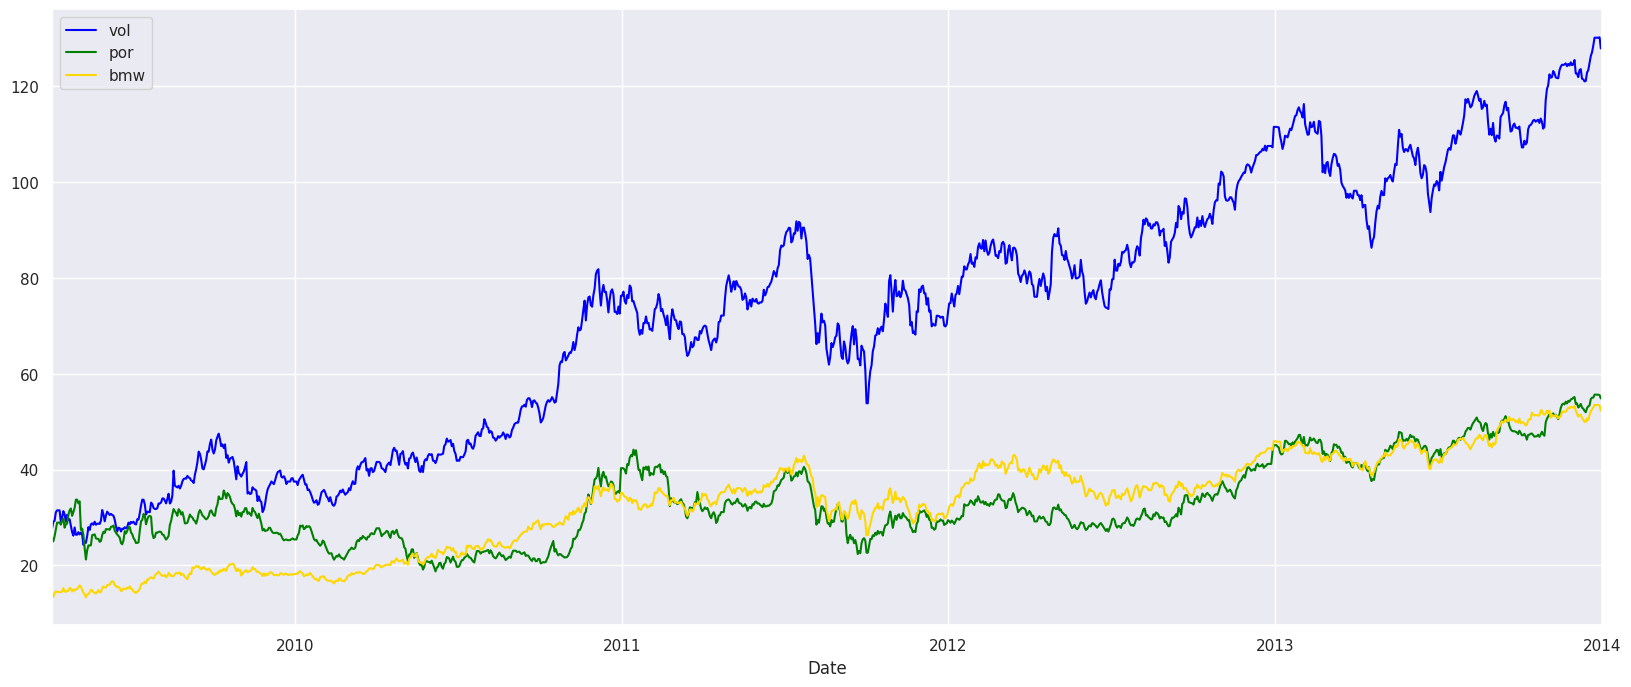

In [16]:
df['vol'][start_date:end_date].plot(figsize=(20,8), legend=True, color='blue')
df['por'][start_date:end_date].plot(legend=True, color='green')
df['bmw'][start_date:end_date].plot(legend=True, color='gold')

plt.show()

In [ ]:

#color = "#33B8FF"
#color = "#49FF3A"
#color = "#FEB628"

#color = "#1E7EB2"
#color = "#2FAB25"
#color = "#BA861F"

#color = "#0E3A52"
#color = "#225414"
#color = "#7C5913"


## Correlation

In [17]:
print('Correlatin among manufactures from' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('VW and Porsche correlation: \t' + str(df['vol'][start_date : end_date].corr(df['por'][start_date:end_date])))
print('VW and BMW correlation: \t' + str(df['vol'][start_date : end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t' + str(df['por'][start_date : end_date].corr(df['bmw'][start_date:end_date])))


Correlatin among manufactures from2009-04-05 to 2014-01-01

VW and Porsche correlation: 	0.835954702146696
VW and BMW correlation: 	0.9799378224520522
Porsche and BMW correlation: 	0.8052157847423791


In [18]:
print('Correlation among manufactures from' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('VW and Porsche correlation: \t' + str(df['vol'][start_date : ann_1].corr(df['por'][start_date:ann_1])))
print('VW and BMW correlation: \t' + str(df['vol'][start_date : ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t' + str(df['por'][start_date : ann_1].corr(df['bmw'][start_date:ann_1])))


Correlation among manufactures from2009-04-05 to 2009-12-09

VW and Porsche correlation: 	0.6633583458286891
VW and BMW correlation: 	0.842760692253298
Porsche and BMW correlation: 	0.6095037707286575


In [19]:
print('Correlation among manufactures from' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('VW and Porsche correlation: \t' + str(df['vol'][ann_1 : ann_2].corr(df['por'][ann_1:ann_2])))
print('VW and BMW correlation: \t' + str(df['vol'][ann_1 : ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t' + str(df['por'][ann_1 : ann_2].corr(df['bmw'][ann_1:ann_2])))


Correlation among manufactures from2009-12-09 to 2012-07-05

VW and Porsche correlation: 	0.7428267852840826
VW and BMW correlation: 	0.9795942950143097
Porsche and BMW correlation: 	0.7042723417148333


In [20]:
print('Correlation among manufactures from' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('VW and Porsche correlation: \t' + str(df['vol'][ann_2 : end_date].corr(df['por'][ann_1:end_date])))
print('VW and BMW correlation: \t' + str(df['vol'][ann_2 : end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t' + str(df['por'][ann_2 : end_date].corr(df['bmw'][ann_2:end_date])))


Correlation among manufactures from2012-07-05 to 2014-01-01

VW and Porsche correlation: 	0.940523746149817
VW and BMW correlation: 	0.9284447265911975
Porsche and BMW correlation: 	0.9494111712246353


## Best Fitting models

### FOR VW

In [21]:
mdl_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1], m = 5, max_p = 5, max_q = 5)
mdl_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por', 'bmw']][ann_1:ann_2], m = 5, max_p = 5, max_q = 5)
mdl_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por', 'bmw']][ann_2:end_date], m = 5, max_p = 5, max_q = 5)
